In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import scipy
import sklearn
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preprocessing
from scipy.signal import spectrogram

In [14]:
directory = '/Volumes/Samsung_T5/project files/lump_project/data/data_collection'
os.chdir(directory)
csv_files = glob.glob('*.csv')
folder_files = glob.glob('*')
folder_files.sort()
len(folder_files)

11

In [ ]:
# 0 to 1 normalization WITH LUMP
directory = '/Volumes/Samsung_T5/project files/lump_project/data/data_collection'
os.chdir(directory)
folder_files = glob.glob('*')
folder_files.sort()
folder_file = folder_files[0:10]

added_limit_with = 32
range1_w = 0
range2_w = 9
norm_type = 0
window_size = 0

all_subject_accel_1_x, all_subject_accel_1_y, all_subject_accel_2_x ,all_subject_accel_2_y = save_accel_data(folder_file, range1_w, range2_w, added_limit_with)
os.chdir(directory + 'W_all_data')
# all_subject_pressure_data_with.to_csv('all_subject_pressure_data_with_0_1.csv', index = False, header = False)

In [8]:
# def save_accel_data(folder_file, range1, range2, added_limit):
directory = '/Volumes/Samsung_T5/project files/lump_project/data/data_collection/'
os.chdir(directory)
csv_files = glob.glob('*.csv')
folder_files = glob.glob('*')
folder_files.sort()
folder_files.sort()

folder_files = glob.glob('*')
folder_files.sort()
folder_file = folder_files[0:10]
added_limit= 72
range1 = 9
range2 = 13
norm_type = 0
window_size = 0
    

all_subject_accel_1_x = pd.DataFrame()
all_subject_accel_1_y = pd.DataFrame()
all_subject_accel_2_x = pd.DataFrame()
all_subject_accel_2_y = pd.DataFrame()

for file in folder_file:#folder_file:#folder_file:

    single_subject_accel_1_x = pd.DataFrame()
    single_subject_accel_1_y = pd.DataFrame()
    single_subject_accel_2_x = pd.DataFrame()
    single_subject_accel_2_y = pd.DataFrame()
    csv_files = []

    directory_folder = directory + file #folder_file[file] #
    os.chdir(directory_folder)
    object_folders = glob.glob('*')
    print(object_folders)

    for i in range(range1, range2): #13
        single_folder_accel_1_x = pd.DataFrame()
        single_folder_accel_1_y = pd.DataFrame()
        single_folder_accel_2_x = pd.DataFrame()
        single_folder_accel_2_y = pd.DataFrame()
        os.chdir(directory_folder + '/' + str(i + 1))
        csv_files = glob.glob('*.csv')
        print('Folder: ', directory_folder + '/' + str(i + 1), '\n')   
    #         print(csv_files)
        # ITERATE EACH FILE
        skipped = 0
        added = 0;
        for j in range(len(csv_files)): # len(csv_files)

            single_ed_sensor_data_1_x = pd.DataFrame()
            single_ed_sensor_data_1_y = pd.DataFrame()
            single_ed_sensor_data_2_x = pd.DataFrame()
            single_ed_sensor_data_2_y = pd.DataFrame()

            single_accel_data = pd.DataFrame()
            single_accel_data = pd.DataFrame()
            single_csv_data = pd.read_csv(csv_files[j], header = None)
            single_csv_data.columns = [''] * len(single_csv_data.columns)
            single_accel_data = pd.DataFrame(single_csv_data.values[1:1121, 31:]) 

            if((len(single_accel_data) < 1120) or (added == added_limit)):
                skipped = skipped + 1
                print('File skipped: ', csv_files[j], '\n')
    #                     break
                continue
            single_sensor_data_1_x = pd.DataFrame()
            single_sensor_data_1_y = pd.DataFrame()
            single_sensor_data_2_x = pd.DataFrame()
            single_sensor_data_2_y = pd.DataFrame()

            for k in range(1120):
                single_sensor_data_1_x = pd.DataFrame(single_accel_data.values[k, 0:50]) # 0-49
                single_sensor_data_1_y = pd.DataFrame(single_accel_data.values[k, 0+1*50:50*2]) # 50-99
                single_sensor_data_2_x = pd.DataFrame(single_accel_data.values[k, 0+2*50:50*3]) # 100-149
                single_sensor_data_2_y = pd.DataFrame(single_accel_data.values[k, 0+3*50:50*4]) # 150-200

                single_ed_sensor_data_1_x = pd.concat([single_ed_sensor_data_1_x, single_sensor_data_1_x], axis = 0)
                single_ed_sensor_data_1_y = pd.concat([single_ed_sensor_data_1_y, single_sensor_data_1_y], axis = 0)
                single_ed_sensor_data_2_x = pd.concat([single_ed_sensor_data_2_x, single_sensor_data_2_x], axis = 0)
                single_ed_sensor_data_2_y = pd.concat([single_ed_sensor_data_2_y, single_sensor_data_2_y], axis = 0)

            single_folder_accel_1_x = pd.concat([single_folder_accel_1_x, single_ed_sensor_data_1_x], axis = 1)
            single_folder_accel_1_y = pd.concat([single_folder_accel_1_y, single_ed_sensor_data_1_y], axis = 1)
            single_folder_accel_2_x = pd.concat([single_folder_accel_2_x, single_ed_sensor_data_2_x], axis = 1)
            single_folder_accel_2_y = pd.concat([single_folder_accel_2_y, single_ed_sensor_data_2_y], axis = 1)

            added = added + 1;

        if(np.shape(single_folder_accel_1_x)[1] != added_limit):
            print('FOLDER SKIPPED: ', np.shape(single_folder_accel_1_x), '\n')
    #                 break
            continue
        single_subject_accel_1_x = pd.concat([single_subject_accel_1_x, single_folder_accel_1_x], axis = 1)
        single_subject_accel_1_y = pd.concat([single_subject_accel_1_y, single_folder_accel_1_y], axis = 1) 
        single_subject_accel_2_x = pd.concat([single_subject_accel_2_x, single_folder_accel_2_x], axis = 1) 
        single_subject_accel_2_y = pd.concat([single_subject_accel_2_y, single_folder_accel_2_y], axis = 1) 

    all_subject_accel_1_x = pd.concat([all_subject_accel_1_x, single_subject_accel_1_x], axis = 1)
    all_subject_accel_1_y = pd.concat([all_subject_accel_1_y, single_subject_accel_1_y], axis = 1)
    all_subject_accel_2_x = pd.concat([all_subject_accel_2_x, single_subject_accel_2_x], axis = 1)
    all_subject_accel_2_y = pd.concat([all_subject_accel_2_y, single_subject_accel_2_y], axis = 1)

#         all_subject_accel_1_x = all_subject_accel_1_x.reset_index(drop = True)
#         all_subject_accel_1_y = all_subject_accel_1_y.reset_index(drop = True)
#         all_subject_accel_2_x = all_subject_accel_2_x.reset_index(drop = True)
#         all_subject_accel_2_y = all_subject_accel_2_y.reset_index(drop = True)


#     file = file + 1        
#     return all_subject_accel_1_x, all_subject_accel_1_y, all_subject_accel_2_x ,all_subject_accel_2_y

['1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9']
Folder:  /Volumes/Samsung_T5/project files/lump_project/data/data_collection/Asset/10 

File skipped:  2022-03-24-13-02-40.csv 

File skipped:  2022-04-11-08-16-25_ed.csv 

Folder:  /Volumes/Samsung_T5/project files/lump_project/data/data_collection/Asset/11 

File skipped:  2022-03-24-13-41-50.csv 

Folder:  /Volumes/Samsung_T5/project files/lump_project/data/data_collection/Asset/12 

File skipped:  2022-03-30-11-40-21.csv 

File skipped:  2022-03-30-11-40-33.csv 

Folder:  /Volumes/Samsung_T5/project files/lump_project/data/data_collection/Asset/13 

['1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9']
Folder:  /Volumes/Samsung_T5/project files/lump_project/data/data_collection/Azamat/10 

Folder:  /Volumes/Samsung_T5/project files/lump_project/data/data_collection/Azamat/11 

File skipped:  2022-03-29-14-49-01.csv 

Folder:  /Volumes/Samsung_T5/project files/lump_project/data/data_collection/Azam

In [16]:
directory = '/Volumes/Samsung_T5/project files/lump_project/data/data_collection/W_all_data'
os.chdir(directory)
all_subject_accel_1_x.to_csv('all_subject_accel_1_x_without.csv', index = False, header = False)
all_subject_accel_1_y.to_csv('all_subject_accel_1_y_without.csv', index = False, header = False)
all_subject_accel_2_x.to_csv('all_subject_accel_2_x_without.csv', index = False, header = False)
all_subject_accel_2_y.to_csv('all_subject_accel_2_y_without.csv', index = False, header = False)

In [49]:
all_subject_accel_1_xw = all_subject_accel_1_x
all_subject_accel_1_yw = all_subject_accel_1_y
all_subject_accel_2_xw = all_subject_accel_2_x
all_subject_accel_2_yw = all_subject_accel_2_y

# Process Accel data

In [83]:
directory = '/Volumes/Samsung_T5/project files/lump_project/data/data_collection/W_all_data/accel'
os.chdir(directory)
def read_data(filename):
    data = pd.read_csv(glob.glob(filename)[0], header = None)
    data = data.transpose()
    return data
    
names = ['1_x', '1_y', '2_x', '2_y']
all_subject_accel_1_x_with = read_data('all*' + names[0] + '.csv')
all_subject_accel_1_y_with = read_data('all*' + names[1] + '.csv')
all_subject_accel_2_x_with = read_data('all*' + names[2] + '.csv')
all_subject_accel_2_y_with = read_data('all*' + names[3] + '.csv')
all_subject_accel_1_x_without = read_data('all*' + names[0] + '*without.csv')
all_subject_accel_1_y_without = read_data('all*' + names[1] + '*without.csv')
all_subject_accel_2_x_without = read_data('all*' + names[2] + '*without.csv')
all_subject_accel_2_y_without = read_data('all*' + names[3] + '*without.csv')

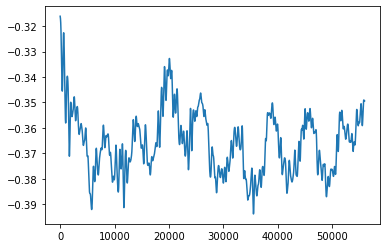

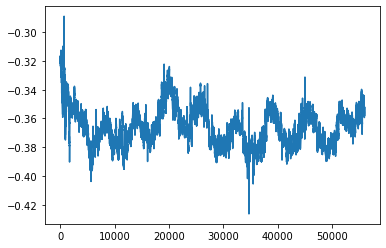

In [99]:
plt.plot(filtered_1_x.values[1, :])
plt.show()
plt.plot(all_subject_accel_1_x_with.values[1, :])

In [100]:
def low_pass_data(data, pole, freq):
    filtered = pd.DataFrame()
    filtered_ = pd.DataFrame()
    
    for i in range(np.shape(data)[0]):
        b, a = scipy.signal.butter(pole, freq)
        filtered = scipy.signal.filtfilt(b, a, data.values[i, :])
        filtered_ = pd.concat([filtered_, pd.DataFrame(filtered)], axis = 1)
    return filtered_.transpose()

pole = 3
freq = 0.005

filtered_1_x = low_pass_data(all_subject_accel_1_x_with, pole, freq)
filtered_1_y = low_pass_data(all_subject_accel_1_y_with, pole, freq)
filtered_2_x = low_pass_data(all_subject_accel_2_x_with, pole, freq)
filtered_2_y = low_pass_data(all_subject_accel_2_y_with, pole, freq)

filtered_1_x_without = low_pass_data(all_subject_accel_1_x_without, pole, freq)
filtered_1_y_without = low_pass_data(all_subject_accel_1_y_without, pole, freq)
filtered_2_x_without = low_pass_data(all_subject_accel_2_x_without, pole, freq)
filtered_2_y_without = low_pass_data(all_subject_accel_2_y_without, pole, freq)


In [101]:
directory = '/Volumes/Samsung_T5/project files/lump_project/data/data_collection/W_all_data'
os.chdir(directory)
filtered_1_x.to_csv('filtered_1_x.csv', header = None)
filtered_1_y.to_csv('filtered_1_y.csv', header = None)
filtered_2_x.to_csv('filtered_2_x.csv', header = None)
filtered_2_y.to_csv('filtered_2_y.csv', header = None)
filtered_1_x_without.to_csv('filtered_1_x_without.csv', header = None)
filtered_1_y_without.to_csv('filtered_1_y_without.csv', header = None)
filtered_2_x_without.to_csv('filtered_2_x_without.csv', header = None)
filtered_2_y_without.to_csv('filtered_2_y_without.csv', header = None)

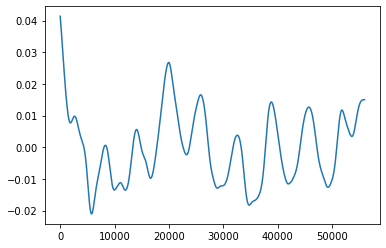

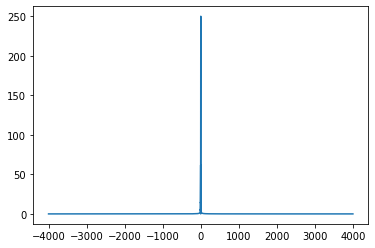

In [47]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()
spectrogram(filtered_1_x.values[1, :])

In [ ]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()